<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0

Text(0.5, 1.0, 'survival rate')

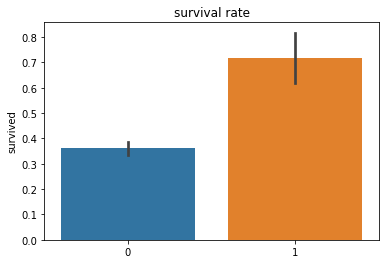

In [32]:
import pandas as pd #importing pandas to read the excel sheet
import numpy as np
import matplotlib.pyplot as plt #importing malplotlib so we can visualise the data
import sklearn
import seaborn as sns #used seaborn to visualize clusters
from sklearn.cluster import KMeans #sklearns is for clustering the data together
import sklearn.metrics as sm #used to evaluate the models created
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

TI = pd.read_excel (r'C:\Users\foxsq\OneDrive\Documents\ctu school stuff\Machine Learning\CS379T-Week-1-IP.xlsx') #loading the excel sheet into the program.

TI.info() #shows shorthand information about the dataset

TI['age'].fillna(TI['age'].mean(), inplace =True) #fills in missing values for age with the mean age

TI['fare'].fillna(TI['fare'].mean(), inplace = True) #fills in missing values for fare with the mean fare

TI = TI[~TI.embarked.isna()] #removes missing values from embarked

TI.info() #shows data after replacing and removing missing values.

TI_passinfo = TI.drop(['pclass', 'name', 'cabin', 'ticket', 'boat', 'home.dest', 'body'], axis = 1) #drops columns that are irrelevant to clustering

TI_passinfo = pd.get_dummies(TI_passinfo, columns = ['sex', 'embarked']) #sorts categories within columns

TI_passinfo.info() #prints passenger info with sorts

X = TI_passinfo #sets passenger info dataset as a method

KM = KMeans(n_clusters=2) #sets clusters to 2, and default random state
clustering = KM.fit_predict(X) #sets up clusters for passenger info

TI['clustering'] = clustering #adds clustering cluster to dataset

sns.barplot(x = clustering, y = TI.survived).set_title('survival rate') #clustering for survival



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
special values in pclass column is: 3
special values in survived column is: 2
special values in name column is: 1307
special values in sex column is: 2
special values in age column is: 98
s

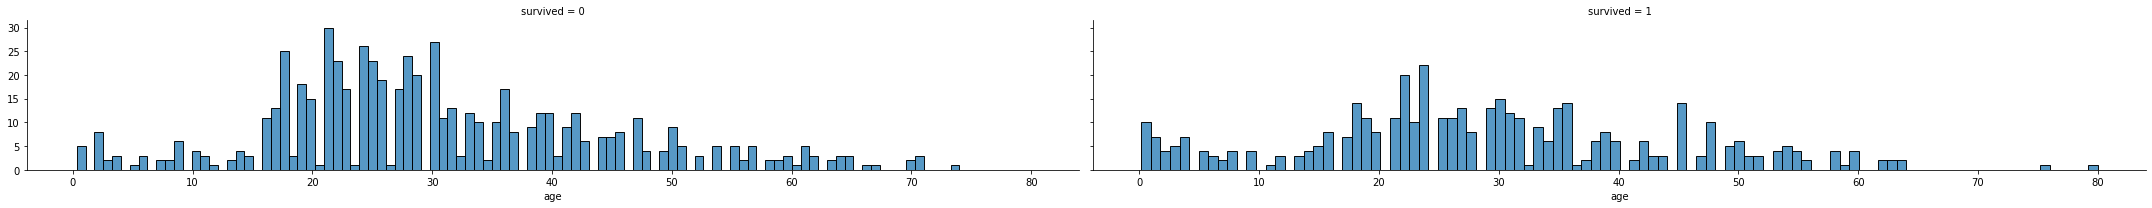

In [43]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier


TITrain = pd.read_excel (r'C:\Users\foxsq\OneDrive\Documents\ctu school stuff\Machine Learning\CS379T-Week-1-IP.xlsx') #loading the excel sheet into the program to train it.

TITest = pd.read_excel (r'C:\Users\foxsq\OneDrive\Documents\ctu school stuff\Machine Learning\CS379T-Week-1-IP.xlsx') #loading the excel sheet into the program to test it.

TITrain.info() #shows shorthand info about the dataset

columns = TITrain.columns #breaks the dataset into its columns

for col in columns:
    print ("special values in {} column is: {}". format(col, TITrain[col].value_counts().size)) #prints the values within each column that are different from eachother

#training starts here by breaking down each section into their representations.

print ('Male Passengers: ')
print (TITrain.loc[TITrain.sex == 'male'].sex.size) #prints male passenger number

print ('Female Passengers: ')
print (TITrain.loc[TITrain.sex == 'female'].sex.size) #prints female passenger number

print ('percentage of people that survived in regard to sex: ')
print (100 * TITrain.groupby('sex').survived.mean()) #shows percentage of people that survived when sorted by sex

AGEMAP = sns.FacetGrid(col = 'survived', data = TITrain, height = 3, aspect = 5)
AGEMAP.map(sns.histplot, 'age', kde = False, bins = 100) #generates a bar graph of the survived data in terms of age.

TITrain = TITrain.drop(['name', 'ticket', 'fare', 'cabin', 'boat', 'body', 'home.dest'], axis = 1) #drops unneeded columns from datasets in regard to survival
TITrain = TITrain.dropna(subset = ['embarked', 'age']) #drops null values from age and left from

print(TITrain['sex'].unique()) #prints each sex
print(TITrain['embarked'].unique()) #prints each boarding location

Labels = LabelEncoder() #used to tranfsorm test into values

#TITrain.drop([0])

TITrain.iloc[:,2] = Labels.fit_transform(TITrain.iloc[:,2].values) #transforms sex into numbers

TITrain.iloc[:,6] = Labels.fit_transform(TITrain.iloc[:,6].values) #transforms embarked into numbers

#print(Labels.fit_transform(TITrain.iloc[:,4]))
print(TITrain['sex'].unique()) #prints each sex
print(TITrain['embarked'].unique()) #prints each boarding location

X = TITrain.iloc[:, 1:8].values #splits values into 80% training
Y = TITrain.iloc[:, 0].values #and 20 percent testing for data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state = 0) #sets up data for split

SS = StandardScaler() #scales the data to fit our peramiters
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

Ocean = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0) #decided to use ocean cause titanic data
Ocean.fit(X_train, Y_train)

print("Testing accuracy: ", Ocean.score(X_train, Y_train)) #printing training score for random forest testing

#creating values for testing methods

Survivor = [[2, 1, 29, 0, 0, 2]] #values chosen from my life
Prediction = Ocean.predict(Survivor) #feeds values into program

print(Prediction) #prints predicted values.

if Prediction == 0:
    print("YOU DIED") #game refrence

else:
    print('Lucky') #also a game refrence




using random forest for my learning because i think that it fits the data set the best.